In [ ]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
#Source:https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance
df=pd.read_csv('/student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [ ]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [ ]:
df.isnull().sum()


,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [ ]:
#fill parental_education_level empty values with unknown
df['parental_education_level'].fillna('Unknown', inplace=True)

<ipython-input-12-a79fbf2c5063>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parental_education_level'].fillna('Unknown', inplace=True)


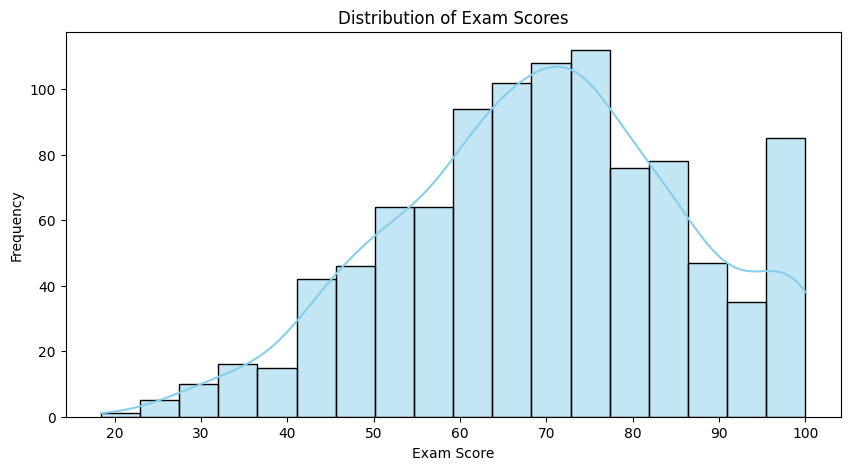

In [ ]:
#colormap categorial plot
plt.figure(figsize=(10,5))
sns.histplot(df['exam_score'],kde=True,color='skyblue')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Scores')
plt.show()

<ipython-input-79-8907a6a9b7e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df,x='internet_quality',y='exam_score',kind='bar',palette="husl")


<Figure size 1000x500 with 0 Axes>

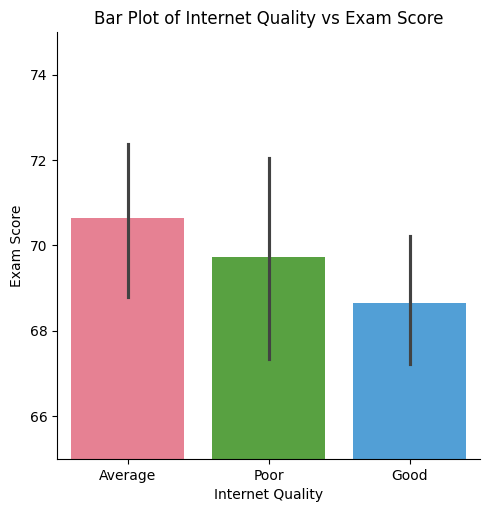

In [ ]:
#categorial plot
plt.figure(figsize=(10,5))
sns.catplot(data=df,x='internet_quality',y='exam_score',kind='bar',palette="husl")
plt.ylim(65, 75)
plt.xlabel('Internet Quality')
plt.ylabel('Exam Score')
plt.title('Bar Plot of Internet Quality vs Exam Score')
plt.show()

<ipython-input-126-7169f9784aff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,x='diet_quality',y='exam_score',palette="coolwarm")


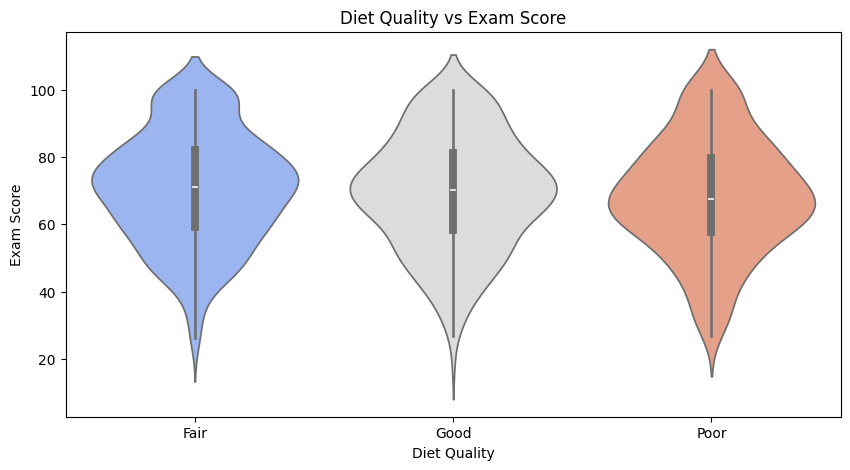

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [ ]:
#categorical violion plot
plt.figure(figsize=(10,5))
sns.violinplot(data=df,x='diet_quality',y='exam_score',palette="coolwarm")
plt.xlabel('Diet Quality')
plt.ylabel('Exam Score')
plt.title('Diet Quality vs Exam Score')
plt.show()
plt

<ipython-input-127-eca16345d20a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df,x='diet_quality',y='exam_score',kind='box',palette="husl")


<Figure size 1000x500 with 0 Axes>

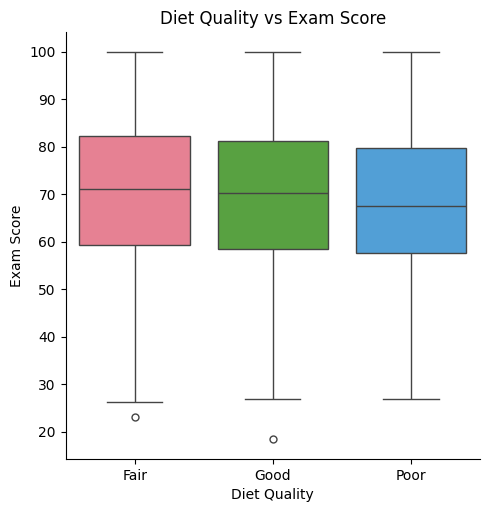

In [ ]:
#box plot using cat plot
plt.figure(figsize=(10,5))
sns.catplot(data=df,x='diet_quality',y='exam_score',kind='box',palette="husl")
plt.xlabel('Diet Quality')
plt.ylabel('Exam Score')
plt.title('Diet Quality vs Exam Score')
plt.show()

<ipython-input-128-c014899136e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='diet_quality', y='exam_score', palette='viridis')


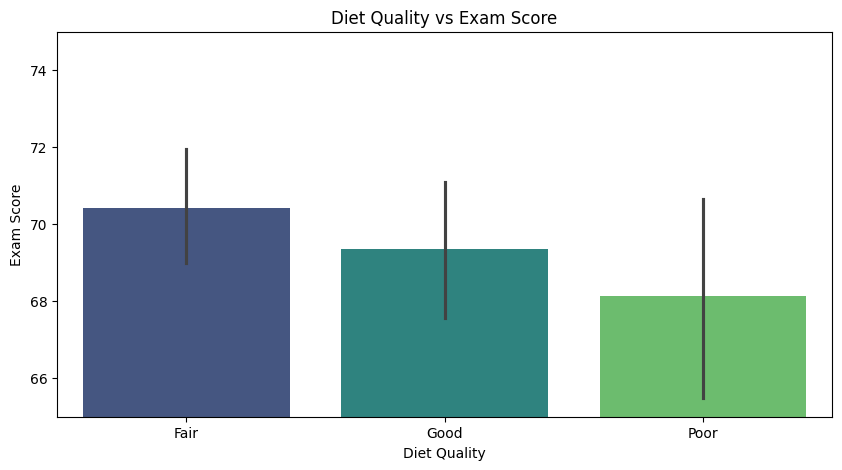

In [ ]:
# bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='diet_quality', y='exam_score', palette='viridis')
plt.ylim(65, 75)
plt.xlabel('Diet Quality')
plt.ylabel('Exam Score')
plt.title('Diet Quality vs Exam Score')
plt.show()

<ipython-input-129-73ef97a7c3c5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,x='gender',y='study_hours_per_day',palette='viridis')


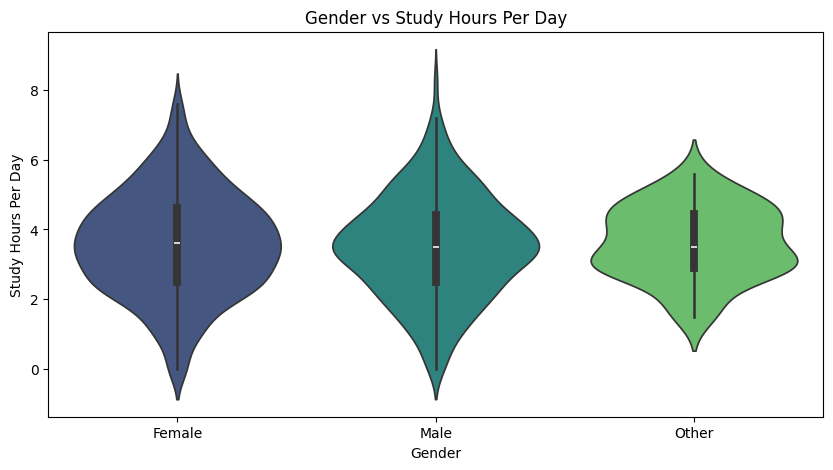

In [ ]:
#violion plot
plt.figure(figsize=(10,5))
sns.violinplot(data=df,x='gender',y='study_hours_per_day',palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Study Hours Per Day')
plt.title('Gender vs Study Hours Per Day')
plt.show()

<ipython-input-130-88c7b52a7b37>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df,x='internet_quality',y='exam_score',palette="viridis")


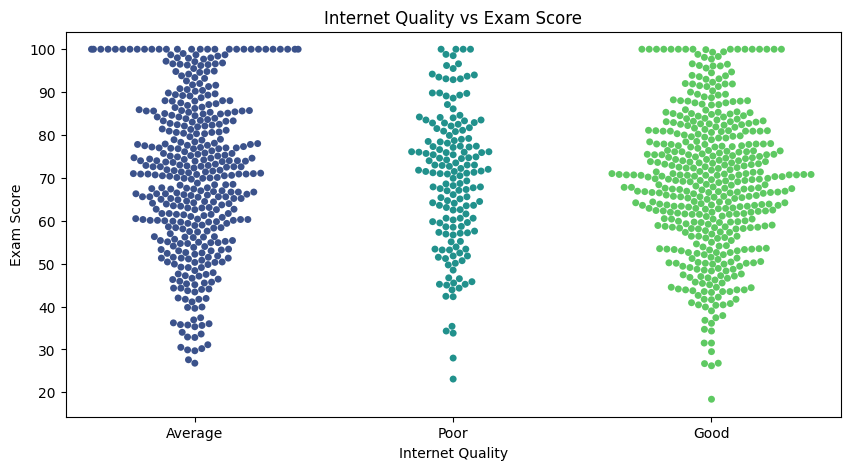

In [ ]:
#swarm plot
plt.figure(figsize=(10,5))
sns.swarmplot(data=df,x='internet_quality',y='exam_score',palette="viridis")
plt.xlabel('Internet Quality')
plt.ylabel('Exam Score')
plt.title('Internet Quality vs Exam Score')
plt.show()

<ipython-input-131-09d095e49ee7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='internet_quality', y='exam_score', jitter=True, palette="husl")


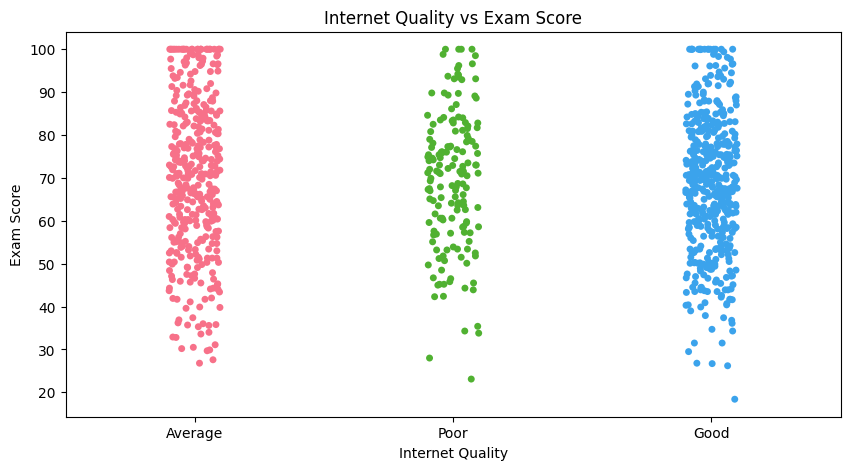

In [ ]:
#strip polot
plt.figure(figsize=(10, 5))
sns.stripplot(data=df, x='internet_quality', y='exam_score', jitter=True, palette="husl")
plt.xlabel('Internet Quality')
plt.ylabel('Exam Score')
plt.title('Internet Quality vs Exam Score')
plt.show()


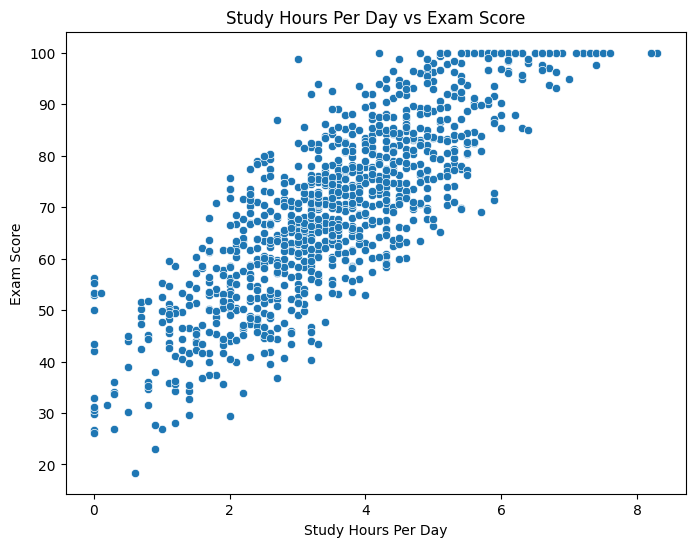

In [ ]:
#Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score')
plt.xlabel('Study Hours Per Day')
plt.ylabel('Exam Score')
plt.title('Study Hours Per Day vs Exam Score')
plt.show()

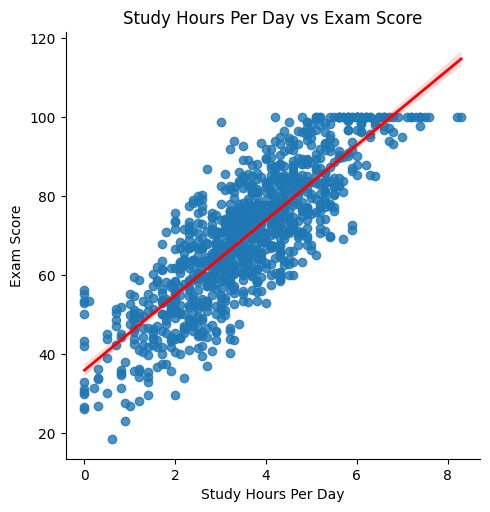

In [ ]:
#lmplot with a regression line
sns.lmplot(data=df, x='study_hours_per_day', y='exam_score',  line_kws={"color": "red", "lw": 2})
plt.xlabel('Study Hours Per Day')
plt.ylabel('Exam Score')
plt.title('Study Hours Per Day vs Exam Score')
plt.show()

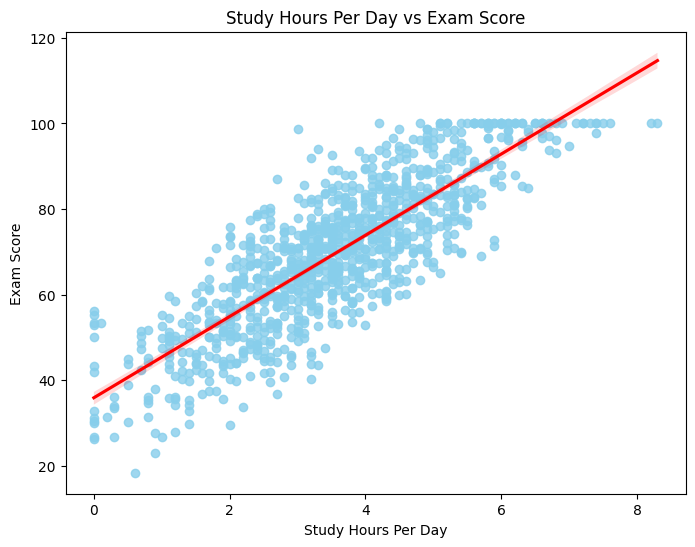

In [ ]:
#regplot with  regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='study_hours_per_day', y='exam_score', scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})
plt.xlabel('Study Hours Per Day')
plt.ylabel('Exam Score')
plt.title('Study Hours Per Day vs Exam Score')
plt.show()

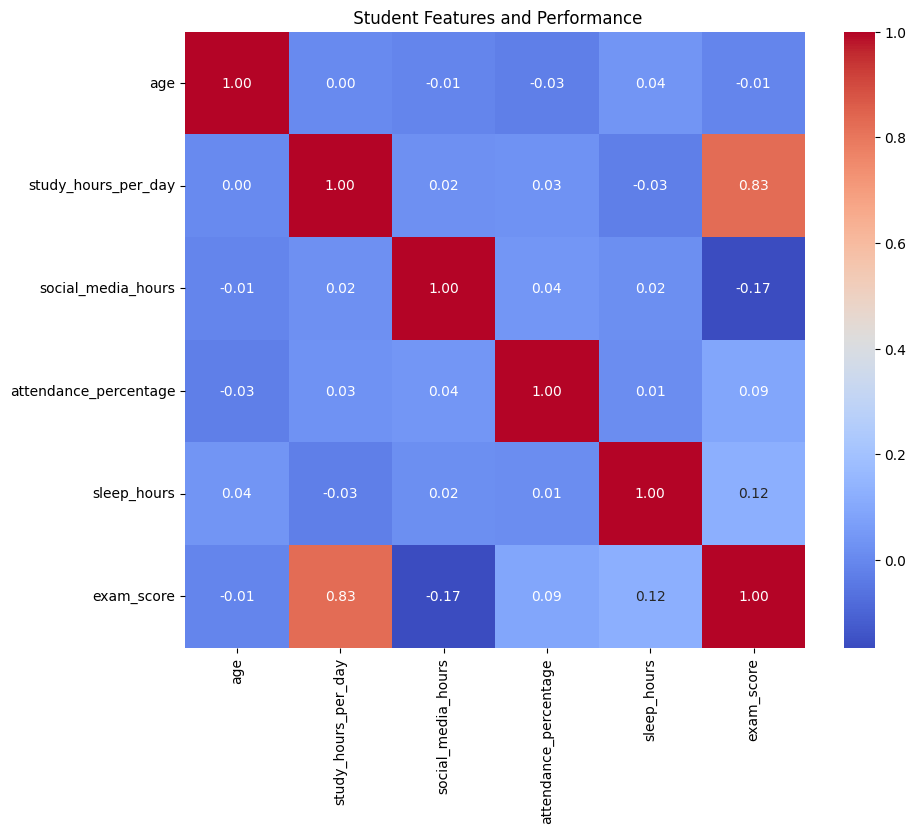

In [ ]:
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['age', 'study_hours_per_day', 'social_media_hours', 'attendance_percentage', 'sleep_hours', 'exam_score']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Student Features and Performance')
plt.show()

<Figure size 1200x1000 with 0 Axes>

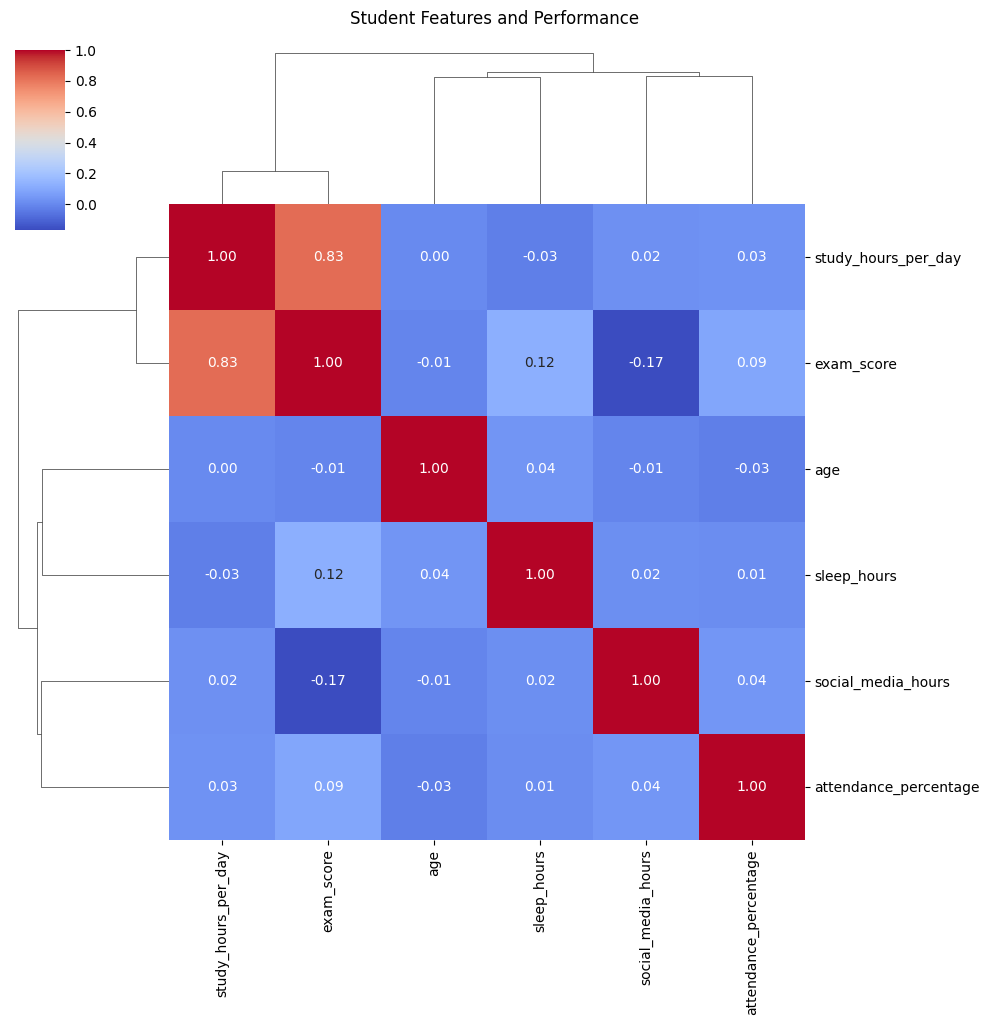

In [ ]:
#clustermap
plt.figure(figsize=(12, 10))
clustermap_data = df[['age', 'study_hours_per_day', 'social_media_hours', 'attendance_percentage', 'sleep_hours', 'exam_score']]
sns.clustermap(clustermap_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.suptitle('Student Features and Performance', y=1.02)
plt.show()

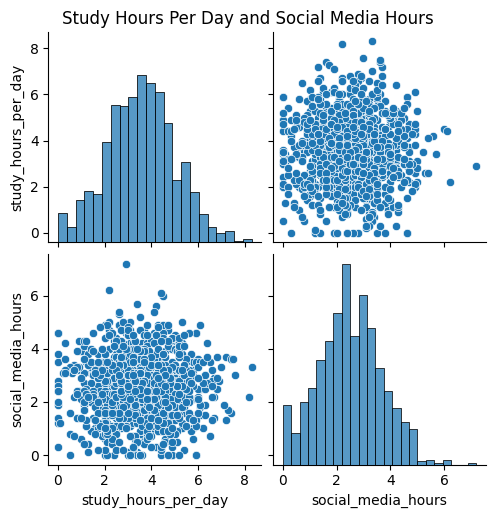

In [ ]:
#pairplot
sns.pairplot(df[['study_hours_per_day', 'social_media_hours']])
plt.suptitle('Study Hours Per Day and Social Media Hours', y=1.02)
plt.show()

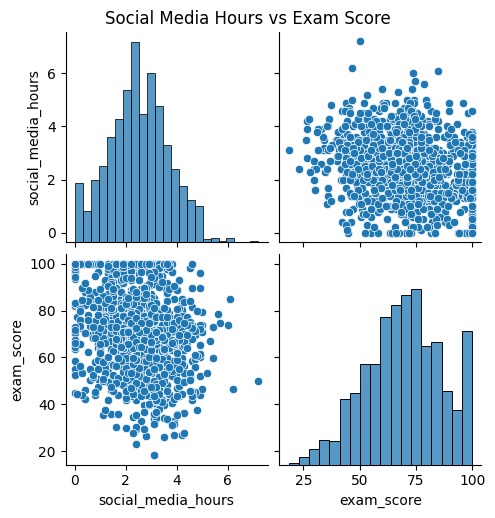

In [ ]:
#pairplot
import matplotlib.pyplot as plt
sns.pairplot(df, vars=['social_media_hours', 'exam_score'])
plt.suptitle('Social Media Hours vs Exam Score', y=1.02)
plt.show()

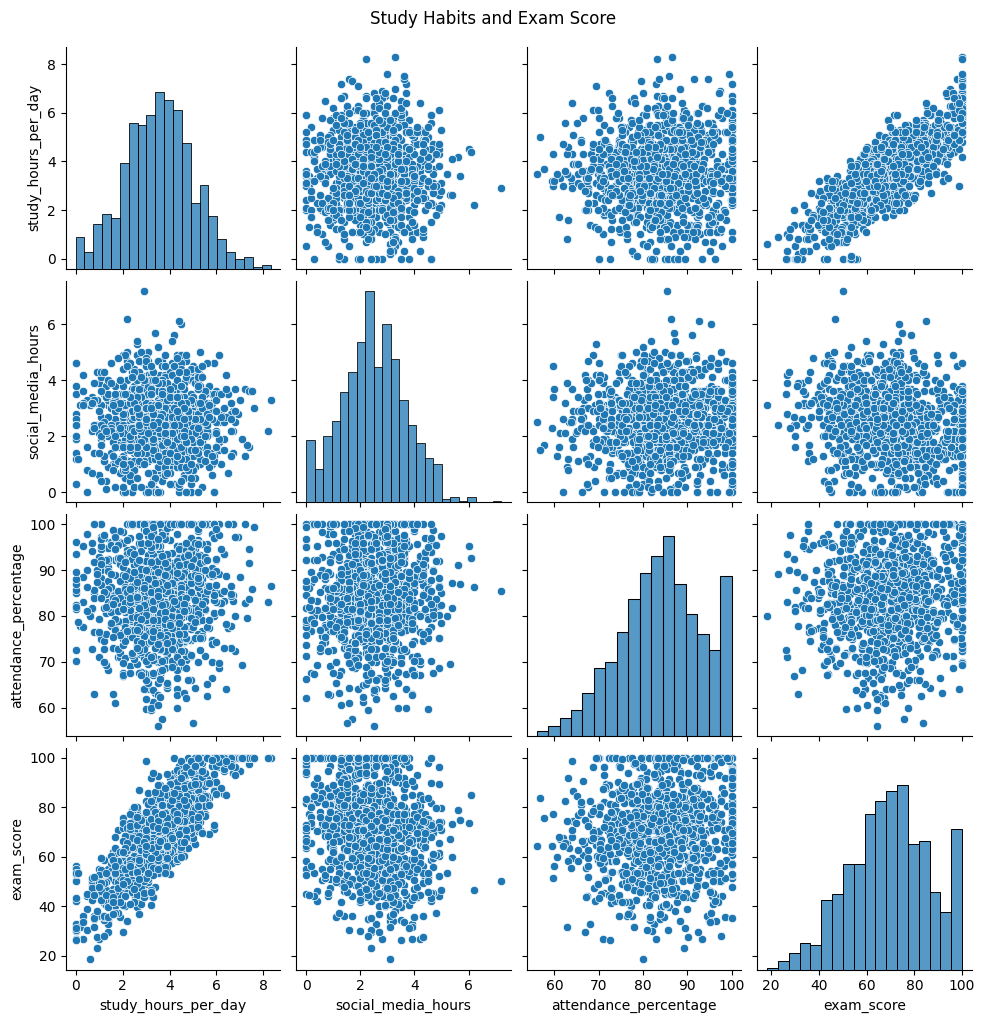

In [ ]:
#pairplot
sns.pairplot(df, vars=['study_hours_per_day', 'social_media_hours', 'attendance_percentage', 'exam_score'])
plt.suptitle('Study Habits and Exam Score', y=1.02)
plt.show()

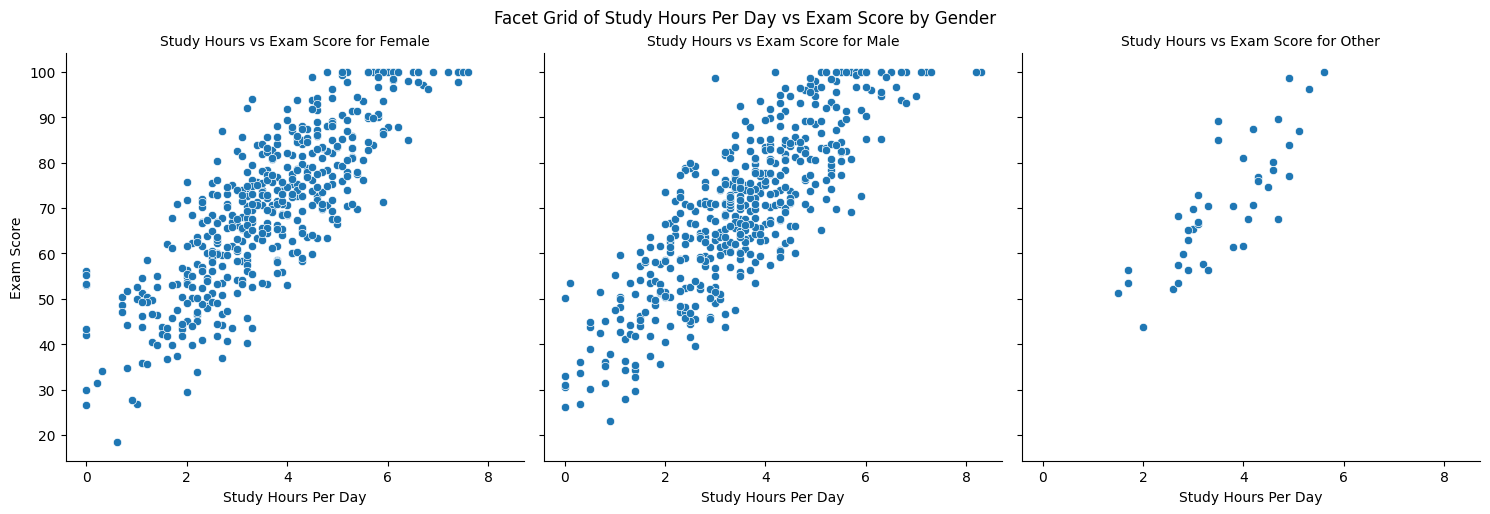

In [ ]:
#Facet Grids
g = sns.FacetGrid(df, col='gender', height=5, aspect=1)
g.map(sns.scatterplot, 'study_hours_per_day', 'exam_score')
g.set_axis_labels('Study Hours Per Day', 'Exam Score')
g.set_titles('Study Hours vs Exam Score for {col_name}')
plt.suptitle('Facet Grid of Study Hours Per Day vs Exam Score by Gender', y=1.02)
plt.show()

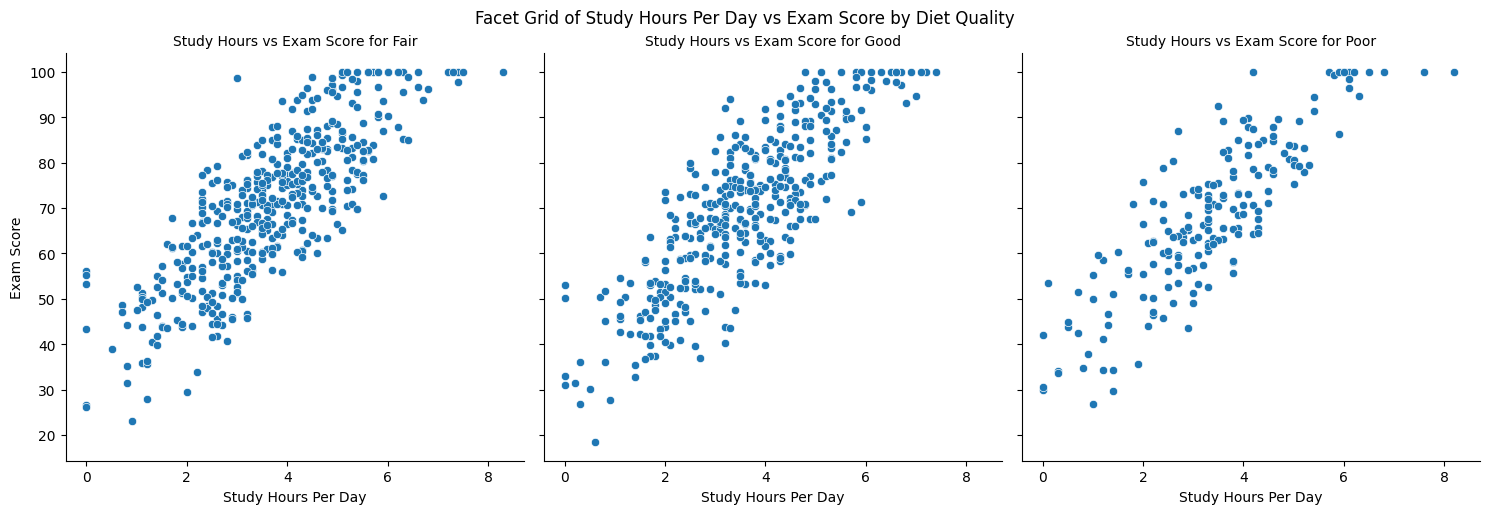

In [ ]:
#Facet Grids
g = sns.FacetGrid(df, col='diet_quality', height=5, aspect=1)
g.map(sns.scatterplot, 'study_hours_per_day', 'exam_score')
g.set_axis_labels('Study Hours Per Day', 'Exam Score')
g.set_titles('Study Hours vs Exam Score for {col_name}')
plt.suptitle('Facet Grid of Study Hours Per Day vs Exam Score by Diet Quality', y=1.02)
plt.show()

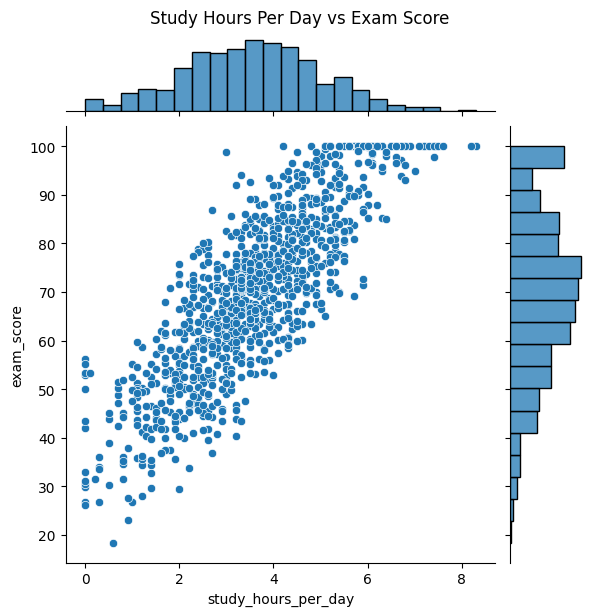

In [ ]:
#jointplot
sns.jointplot(data=df, x='study_hours_per_day', y='exam_score', kind='scatter')
plt.suptitle('Study Hours Per Day vs Exam Score', y=1.02)
plt.show()

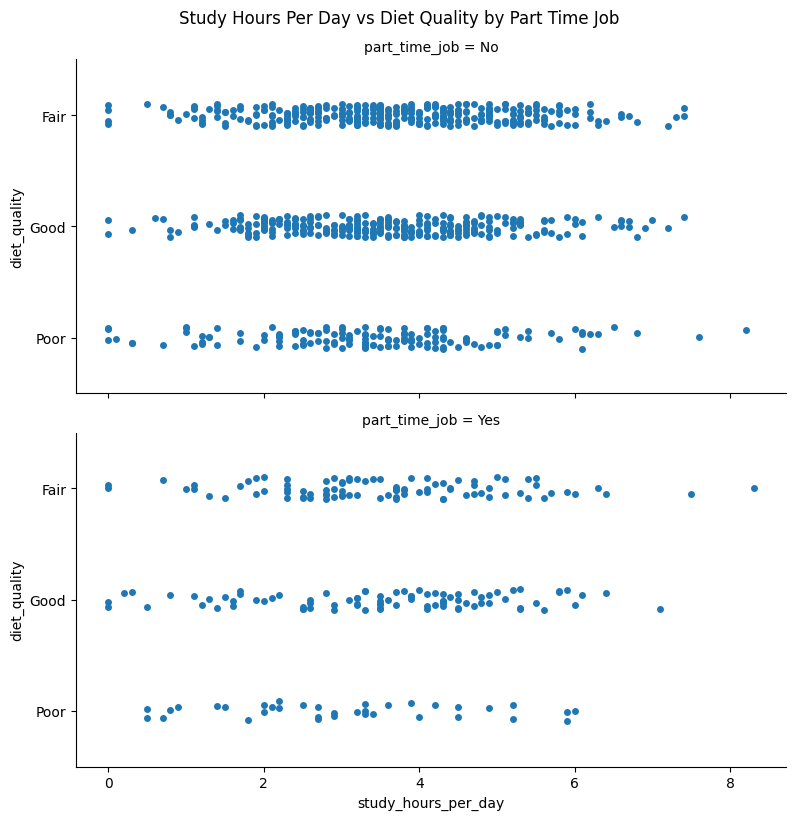

In [ ]:
#cat plot
sns.catplot(data=df, x='study_hours_per_day', y='diet_quality', row='part_time_job', kind='strip', height=4, aspect=2)
plt.suptitle('Study Hours Per Day vs Diet Quality by Part Time Job', y=1.02)
plt.show()

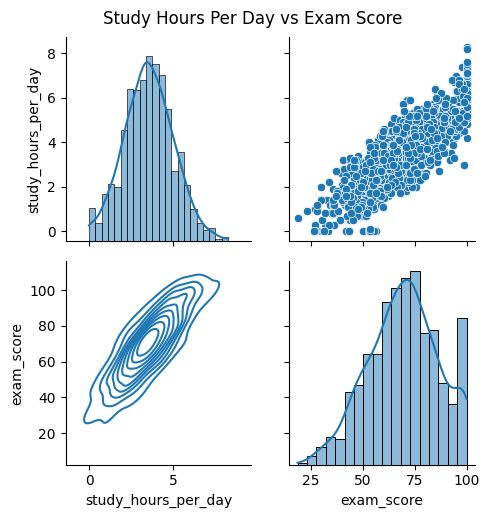

In [ ]:
#PairGrid
g = sns.PairGrid(df, vars=['study_hours_per_day', 'exam_score'])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde=True)
g.fig.suptitle('Study Hours Per Day vs Exam Score', y=1.02)
plt.show()